In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
import re

In [64]:
with open("sample.ibwrite",'r') as f:
        filetext = f.read()

print(filetext)

---------------------------------------------------------------------------------------
                    RDMA_Write BW Test
 Dual-port       : OFFDevice         : mlx5_1
 Number of qps   : 1Transport type : IB
 Connection type : RCUsing SRQ      : OFF
 TX depth        : 128
 CQ Moderation   : 100
 Mtu             : 4096[B]
 Link type       : IB
 Max inline data : 0[B]
 rdma_cm QPs : OFF
 Data ex. method : Ethernet
---------------------------------------------------------------------------------------
 local address: LID 0x04 QPN 0x0893 PSN 0xe3919b RKey 0x08643c VAddr 0x007f8813aba000
 remote address: LID 0x06 QPN 0x0893 PSN 0x6f6913 RKey 0x08b5e1 VAddr 0x007fe9861f7000
---------------------------------------------------------------------------------------
 #bytes     #iterations    BW peak[Gb/sec]    BW average[Gb/sec]   MsgRate[Mpps]
 2          5000           0.076490            0.074258            4.641094
 4          5000             0.30               0.29      9.005148
 8    

In [65]:
def read_perftest_output(filename):
    csv_buffer=""
    with open(filename,'r') as f:
        filetext = f.read()

    # https://regex101.com/r/4NShAc/2
    regex = r"(?<=--\n)( #bytes.*)(?=\n--)"
    matches = re.search(regex, filetext, re.DOTALL)
    if matches:
        for line in matches.group(0).splitlines():
            if line.startswith(" #bytes"):
                csv_buffer+= ",".join(line.replace("BW","").replace("[Gb/sec]","").replace("[Mpps]","").replace("#","").\
                            replace("[usec]","").replace("percentile","").split()) + "\n"
            else:
                csv_buffer+= ",".join(line.split()) + "\n"
            
    return csv_buffer

In [66]:
print(read_perftest_output("sample.ibwrite"))

bytes,iterations,peak,average,MsgRate
2,5000,0.076490,0.074258,4.641094
4,5000,0.30,0.29,9.005148
8,5000,0.60,0.60,9.385083
16,5000,1.20,1.13,8.798245
32,5000,2.41,2.29,8.928812
64,5000,4.84,4.80,9.383235
128,5000,9.53,8.90,8.695316
256,5000,19.20,17.05,8.327515
512,5000,37.52,34.95,8.532702
1024,5000,72.55,65.08,7.944629
2048,5000,92.30,86.00,5.249035
4096,5000,95.79,93.12,2.841712
8192,5000,95.04,94.70,1.445035
16384,5000,95.47,95.45,0.728236
32768,5000,95.44,95.40,0.363905
65536,5000,95.45,95.43,0.182015
131072,5000,95.49,95.49,0.091070
262144,5000,95.68,95.60,0.045585
524288,5000,95.53,95.53,0.022775
1048576,5000,95.54,95.53,0.011388
2097152,5000,95.52,95.52,0.005693
4194304,5000,95.50,95.50,0.002846
8388608,5000,95.49,95.49,0.001423



In [67]:
df = pd.read_csv(StringIO(read_perftest_output("sample.ibwrite")))

Let's look at the first 10 rows:

In [68]:
df.head(10)

,bytes,iterations,peak,average,MsgRate
0,2,5000,0.07649,0.074258,4.641094
1,4,5000,0.30000,0.290000,9.005148
2,8,5000,0.60000,0.600000,9.385083
3,16,5000,1.20000,1.130000,8.798245
4,32,5000,2.41000,2.290000,8.928812
5,64,5000,4.84000,4.800000,9.383235
6,128,5000,9.53000,8.900000,8.695316
7,256,5000,19.20000,17.050000,8.327515
8,512,5000,37.52000,34.950000,8.532702
9,1024,5000,72.55000,65.080000,7.944629


Now that we have the data in a conventient DataFrame, we can plot the bandwidth:

In [71]:
df.peak.max()

95.79

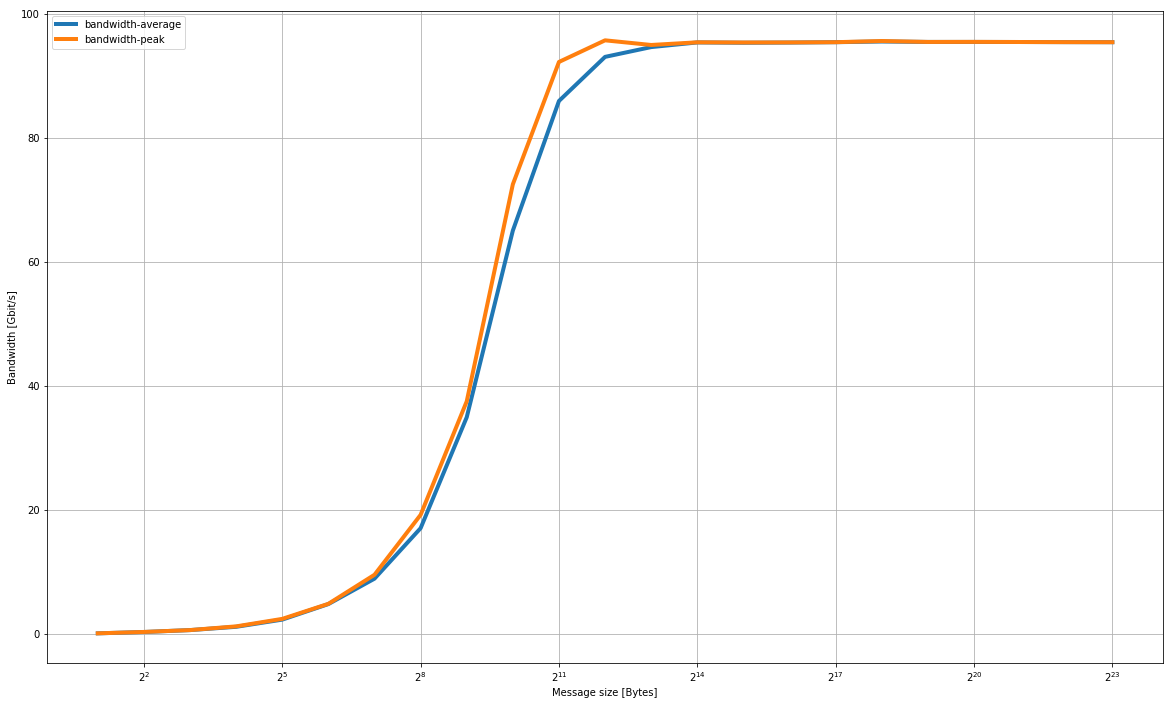

In [70]:
plt.grid(True)
plt.xscale('log', basex=2)
plt.xlabel('Message size [Bytes]')
plt.ylabel('Bandwidth [Gbit/s]')
plt.rcParams['figure.figsize'] = [20,12]
lw=4.0

plt.plot(df.bytes,df.average,linewidth=lw, label="bandwidth-average")
plt.plot(df.bytes,df.peak,linewidth=lw, label="bandwidth-peak")

plt.legend()  